In [1]:
import pandas as pd
landmarks = pd.read_csv("/content/landmarks.csv")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import re
import csv
import numpy as np
from sklearn.metrics import accuracy_score
import pickle

In [3]:
def read_landmarks_from_csv(file_path):
    landmarks_data = []
    labels = []

    with open(file_path, "r") as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            landmarks_str = row[0]
            label = row[1] if len(row) > 1 else ""

            landmarks = []
            for match in re.finditer(
                r"x: (\d+\.\d+)\s+y: (\d+\.\d+)\s+z: (-?\d+\.\d+)", landmarks_str
            ):
                x = float(match.group(1))
                y = float(match.group(2))
                z = float(match.group(3))
                landmarks.extend([x, y, z])

            landmarks_data.append(landmarks)
            labels.append(label)

    max_length = max(len(landmarks) for landmarks in landmarks_data)
    landmarks_data = [
        landmarks + [0] * (max_length - len(landmarks)) for landmarks in landmarks_data
    ]

    return np.array(landmarks_data), labels

In [4]:
x, y = read_landmarks_from_csv("/content/landmarks.csv")

In [5]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.1, random_state=10)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.2, random_state=10)

In [49]:

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Create LogisticRegression model
lr = LogisticRegression(max_iter = 1000)

# Train the model on the training data
lr.fit(x_train, y_train)

# Predict on the test data
y_pred_lr = lr.predict(x_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print accuracy
print("Logistic Regression Accuracy on Test Data:", accuracy_lr)

# Create SVM model
svm = SVC()

# Train the model on the training data
svm.fit(x_train, y_train)

# Predict on the test data
y_pred_svm = svm.predict(x_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print accuracy
print("SVM Accuracy on Test Data:", accuracy_svm)

# Create KNN model
knn = KNeighborsClassifier()

# Train the model on the training data
knn.fit(x_train, y_train)

# Predict on the test data
y_pred_knn = knn.predict(x_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print accuracy
print("KNN Accuracy on Test Data:", accuracy_knn)

Logistic Regression Accuracy on Test Data: 0.3375
SVM Accuracy on Test Data: 0.39166666666666666
KNN Accuracy on Test Data: 0.35833333333333334


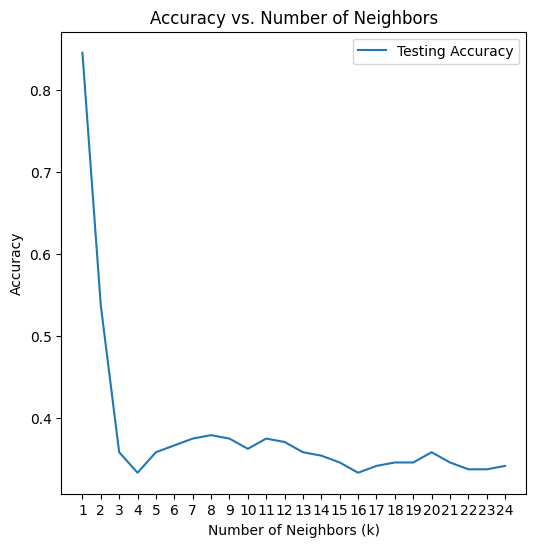

In [23]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_values = np.arange(1, 25)
test_accuracy = []

for k in range(1, 25):
    # Create KNN model with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model on the training data
    knn.fit(x_train, y_train)

    # Predict on the test data
    y_pred = knn.predict(x_test)

    # Calculate accuracy
    test_accuracy.append(metrics.accuracy_score(y_test, y_pred))

# Plot the accuracy for different k values
plt.figure(figsize=[6, 6])
plt.plot(k_values, test_accuracy, label="Testing Accuracy")
plt.legend()
plt.title("Accuracy vs. Number of Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.show()

In [37]:
# Validation accuracy for Logistic Regression
y_pred_val_lr = lr.predict(x_val)
accuracy_val_lr = accuracy_score(y_val, y_pred_val_lr)
print("Logistic Regression Validation Accuracy:", accuracy_val_lr)

# Validation accuracy for SVM
y_pred_val_svm = svm.predict(x_val)
accuracy_val_svm = accuracy_score(y_val, y_pred_val_svm)
print("SVM Validation Accuracy:", accuracy_val_svm)

# Validation accuracy for KNN
y_pred_val_knn = knn.predict(x_val)
accuracy_val_knn = accuracy_score(y_val, y_pred_val_knn)
print("KNN Validation Accuracy:", accuracy_val_knn)


Logistic Regression Validation Accuracy: 0.3768267223382046
SVM Validation Accuracy: 0.3987473903966597
KNN Validation Accuracy: 0.35386221294363257


In [6]:
rfc = RandomForestClassifier(criterion = 'gini',random_state = 10)
rfc.fit(x_train, y_train)
y_pred_rf = rfc.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy on Test Data:", accuracy_rf)

Random Forest Accuracy on Test Data: 0.8666666666666667


In [7]:
y_pred_rf_val = rfc.predict(x_val)
accuracy_rf_val = accuracy_score(y_val, y_pred_rf_val)
print("Random Forest Validation Accuracy:", accuracy_rf_val)

Random Forest Validation Accuracy: 0.8716075156576201


In [8]:
error_train = 1 - accuracy_rf
error_val = 1 - accuracy_rf_val

print("Random Forest Error on Train Data:", error_train)
print("Random Forest Error on Validation Data:", error_val)


Random Forest Error on Train Data: 0.1333333333333333
Random Forest Error on Validation Data: 0.12839248434237993


In [9]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
# Encode the target variable
label_encoder = LabelEncoder()
y_train1 = label_encoder.fit_transform(y_train)
y_test1 = label_encoder.transform(y_test)

xgb = XGBClassifier()
xgb.fit(x_train, y_train1)
y_pred_xgb = xgb.predict(x_test)
accuracy_xgb = accuracy_score(y_test1, y_pred_xgb)
print("XGBoost Accuracy on Test Data:", accuracy_xgb)

XGBoost Accuracy on Test Data: 0.8708333333333333


In [10]:
y_val1 = label_encoder.transform(y_val)
y_pred_val_xgb = xgb.predict(x_val)
accuracy_val_xgb = accuracy_score(y_val1, y_pred_val_xgb)
print("XGBoost Validation Accuracy:", accuracy_val_xgb)

XGBoost Validation Accuracy: 0.872651356993737


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
import pickle

# Save the XGBoost model
with open('/content/drive/MyDrive/xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

# Save the label encoder
with open('/content/drive/MyDrive/label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)
